In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyperparameters
k0 = 1  # default value
gamma_values = [0.5, 0.6, 0.7, 0.8, 0.9]
#number of powers
n_powers = 20
n_values = [1000 * 2 ** i for i in range(n_powers)]

In [3]:
# Function to compute alpha_j
c0 = 1
def compute_alpha(n, gamma, k0):
    return np.array([c0 / (j + k0) ** gamma for j in range(1, n+1)])

In [4]:
# Function to compute q_j using backward induction
def compute_q(alpha, n):
    q = np.zeros(n)
    q[-1] = 1  # Base case: q_{n-1} = 1

    # Backward induction to compute q_j
    for j in range(n-2, 0, -1):
        q[j] = 1 + (1 - alpha[j]) * q[j+1]
    q = q*alpha
    return q

In [5]:
# Function to compute V_gamma
def compute_V(q, n):
    V_gamma = (1 / n) * np.sum(q ** 2)
    return V_gamma

In [6]:
# Prepare data for plotting
results = {}

for gamma in gamma_values:
    abs_diff = []
    for n in n_values:
        alpha = compute_alpha(n, gamma, k0)
        q = compute_q(alpha, n)
        V_gamma = compute_V(q, n)
        abs_diff.append(np.abs(V_gamma - 1))
        print(f"gamma: {gamma}, n: {n}, V_gamma: {V_gamma:.6f}, |V_gamma - 1|: {np.abs(V_gamma - 1):.6f}")
    
    results[gamma] = abs_diff

gamma: 0.5, n: 1000, V_gamma: 1.006802, |V_gamma - 1|: 0.006802
gamma: 0.5, n: 2000, V_gamma: 1.006400, |V_gamma - 1|: 0.006400
gamma: 0.5, n: 4000, V_gamma: 1.005380, |V_gamma - 1|: 0.005380
gamma: 0.5, n: 8000, V_gamma: 1.004260, |V_gamma - 1|: 0.004260
gamma: 0.5, n: 16000, V_gamma: 1.003255, |V_gamma - 1|: 0.003255
gamma: 0.5, n: 32000, V_gamma: 1.002430, |V_gamma - 1|: 0.002430
gamma: 0.5, n: 64000, V_gamma: 1.001785, |V_gamma - 1|: 0.001785
gamma: 0.5, n: 128000, V_gamma: 1.001298, |V_gamma - 1|: 0.001298
gamma: 0.5, n: 256000, V_gamma: 1.000936, |V_gamma - 1|: 0.000936
gamma: 0.5, n: 512000, V_gamma: 1.000672, |V_gamma - 1|: 0.000672
gamma: 0.5, n: 1024000, V_gamma: 1.000480, |V_gamma - 1|: 0.000480
gamma: 0.5, n: 2048000, V_gamma: 1.000342, |V_gamma - 1|: 0.000342
gamma: 0.5, n: 4096000, V_gamma: 1.000243, |V_gamma - 1|: 0.000243
gamma: 0.5, n: 8192000, V_gamma: 1.000173, |V_gamma - 1|: 0.000173
gamma: 0.5, n: 16384000, V_gamma: 1.000123, |V_gamma - 1|: 0.000123
gamma: 0.5, n: 

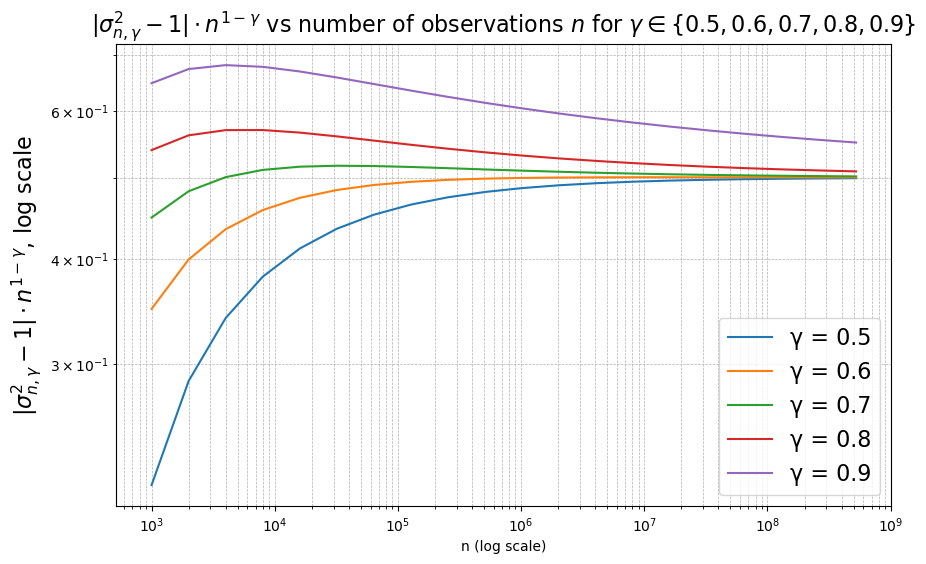

In [19]:
# Plot results
plt.figure(figsize=(10, 6))
for gamma in gamma_values:
    plt.plot(n_values, results[gamma]*np.power(n_values,1-gamma), label=f"γ = {gamma}")

plt.xscale('log')
plt.yscale('log')
plt.xlabel("n (log scale)")
plt.ylabel(r"$|\sigma^2_{n,\gamma} - 1| \cdot n^{1-\gamma}$, log scale",fontsize = 16)
plt.title(r"$|\sigma^2_{n,\gamma} - 1| \cdot n^{1-\gamma}$ vs number of observations $n$ for $\gamma \in \{0.5,0.6,0.7,0.8,0.9\}$",fontsize = 16)
plt.legend(fontsize = 16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()